### Libraries

In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
! pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf
from keras_vggface.vggface import VGGFace
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-aqk1hkt_
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-aqk1hkt_


In [ ]:
!pip install mtcnn

In [ ]:
import os
import re
import keras
import numpy as np
import pandas as pd
import cv2 as cv
import random
import PIL
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
import joblib
import json

from sklearn.neighbors import KDTree, BallTree

import tensorflow
import keras
from keras.preprocessing import image as kimage
from keras.utils import np_utils
from keras.models import Sequential , Model
from keras.applications import imagenet_utils
from keras.preprocessing.image import load_img,img_to_array
#from keras.engine import  Model
from keras.layers import Input

import mtcnn
from mtcnn.mtcnn import MTCNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/'
path2D = '/content/drive/MyDrive/Progetto DIGITAL/02_Classification - 2D/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#drive.flush_and_unmount()

## Importing vips features

In [ ]:
vips_features = pd.read_json(path + 'Vip_features.json')

In [ ]:
vips_features.head()

Features                        Label
0  [7.0904483795, 0.34831571580000004, 1.23080122...    10000_Michelle_Yeoh_4.jpg
1  [1.411768198, 2.5514135361, 1.463588357, 3.909...    10006_Carlos_Menem_16.jpg
2  [0.4796694517, 1.9762576818, 6.7813515663, 6.3...  10007_Zinedine_Zidane_3.jpg
3  [1.1181304455, 1.1092662811, 6.3933877945, 4.9...          10008_Li_Peng_7.jpg
4  [5.8068566322, 1.814124465, 3.81427598, 6.1393...       1000_Amelia_Vega_1.jpg

In [ ]:
# Creating features array
vips_array = []
for vip in vips_features['Features']:
    vips_array.append(vip)
vips_array = np.array(vips_array)

## Immagini per query ed estrazione features

In [ ]:
# feature extraction with VGGFace 
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg')

def VGGFace_features(img):
    x = kimage.img_to_array(img)
    x = utils.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = vgg_features.predict(x)
    return f.flatten()

In [ ]:
# Caricamento delle immagini per le query
Anna = kimage.load_img(path2D + 'Faces/Anna_84.jpg', target_size=(224, 224)) 
Beatrice = kimage.load_img(path2D + 'Faces/Beatrice_33.jpg', target_size=(224, 224)) 
Guglielmo = kimage.load_img(path2D + 'Faces/Guglielmo_117.jpg', target_size=(224, 224)) 

In [ ]:
# Calcolo features
Anna_features = VGGFace_features(Anna)
Beatrice_features = VGGFace_features(Beatrice)
Guglielmo_features = VGGFace_features(Guglielmo)

In [ ]:
# Adding one dimension as required by the KDTree
Anna_features = np.expand_dims(Anna_features, axis=0)
Beatrice_features = np.expand_dims(Beatrice_features, axis=0)
Guglielmo_features = np.expand_dims(Guglielmo_features, axis=0)

# Albero di ricerca

In [ ]:
#costruisco il KDtree
kd_tree = KDTree(vips_array)

### Anna

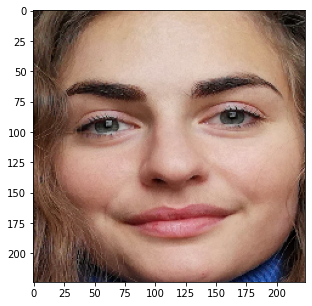

In [ ]:
# Search Anna
dist, ind = kd_tree.query(Anna_features, k=10)
plt.figure(figsize = (5,5))
plt.imshow(Anna)

Text(0.5, 1.0, 'Justine Pasek')

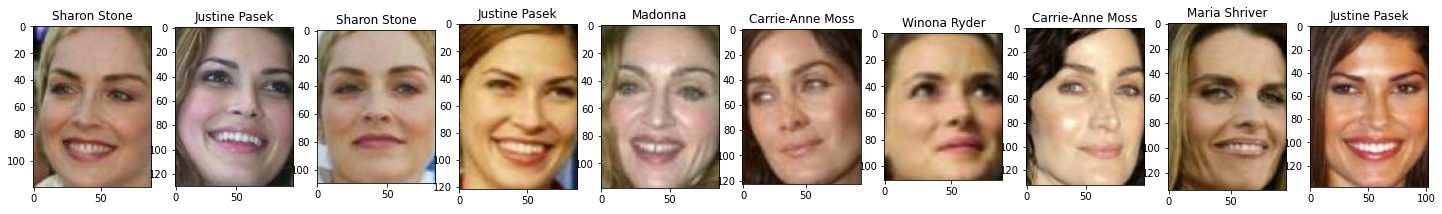

<Figure size 432x288 with 0 Axes>

In [ ]:
# print
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

### Beatrice

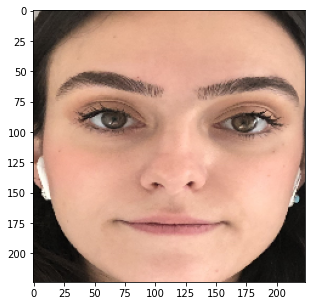

In [ ]:
# Search Beatrice
dist, ind = kd_tree.query(Beatrice_features, k=10)
plt.figure(figsize = (5,5))
plt.imshow(Beatrice)

Text(0.5, 1.0, 'Winona Ryder')

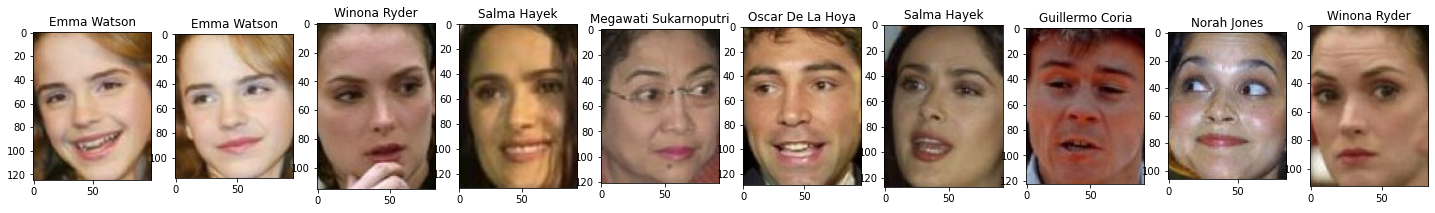

<Figure size 432x288 with 0 Axes>

In [ ]:
# print
simili = []
labels = []

for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

### Guglielmo

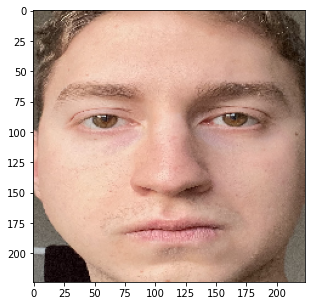

In [ ]:
# Search Guglielmo
dist, ind = kd_tree.query(Guglielmo_features, k=10)
plt.figure(figsize = (5,5))
plt.imshow(Guglielmo)

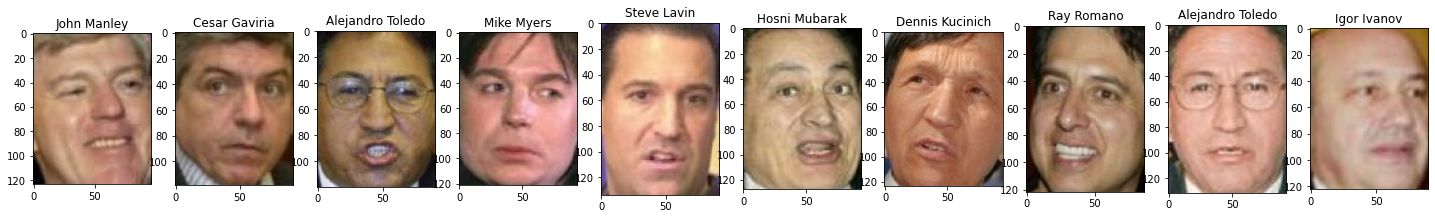

<Figure size 432x288 with 0 Axes>

In [ ]:
# print
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]));

# Celebrity check

In [ ]:
!pip install mtcnn

In [ ]:
import mtcnn
from mtcnn.mtcnn import MTCNN

In [ ]:
detector = MTCNN() # Multi-Task Cascaded Convolutional Neural Network

## Angelina Jolie

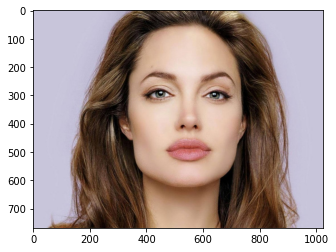

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/angelina-jolie.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Justine Pasek')

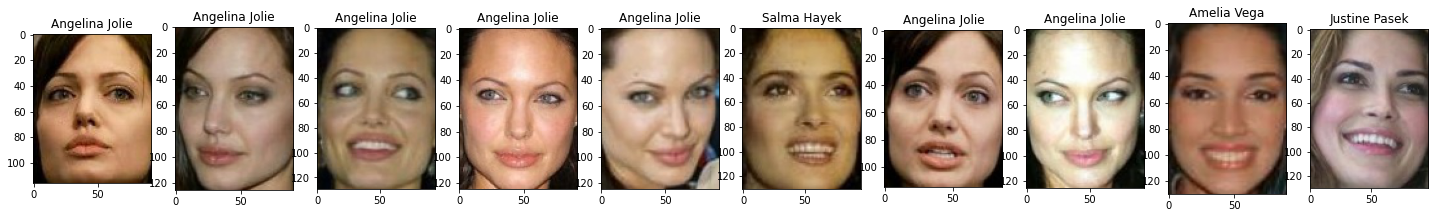

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Lance Armstrong

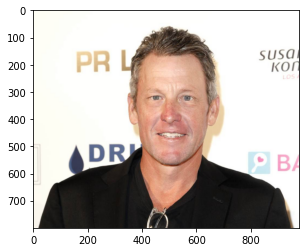

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/lance-armstrong.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Al Gore')

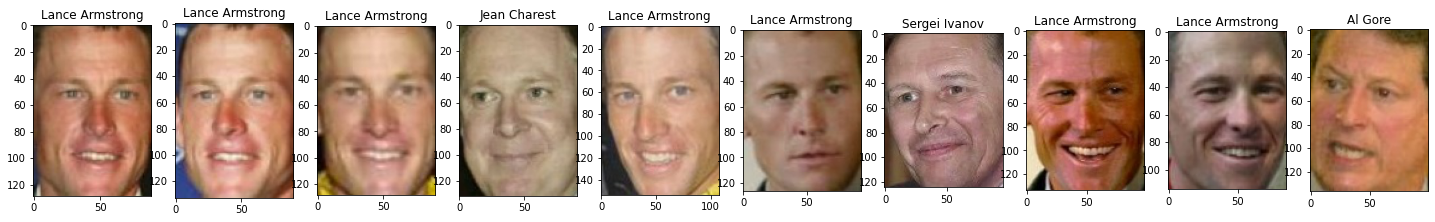

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Jennifer Aniston

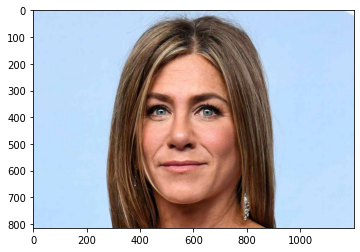

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/Jennifer-Aniston.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Jennifer Aniston')

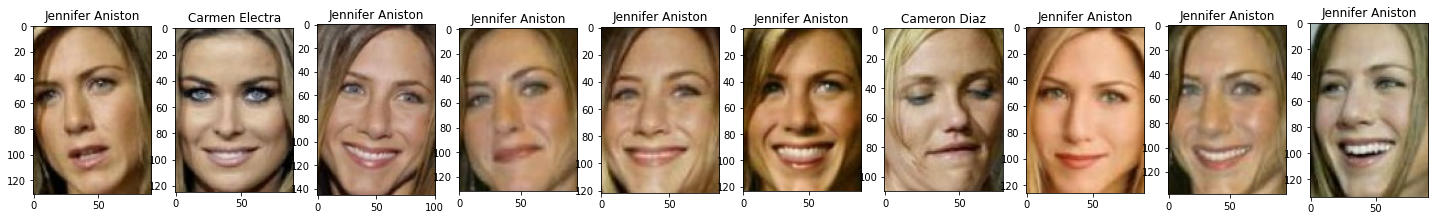

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Michael Schumacher

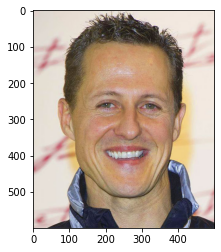

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/Michael_Schumacher.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Mohammed Al-Douri')

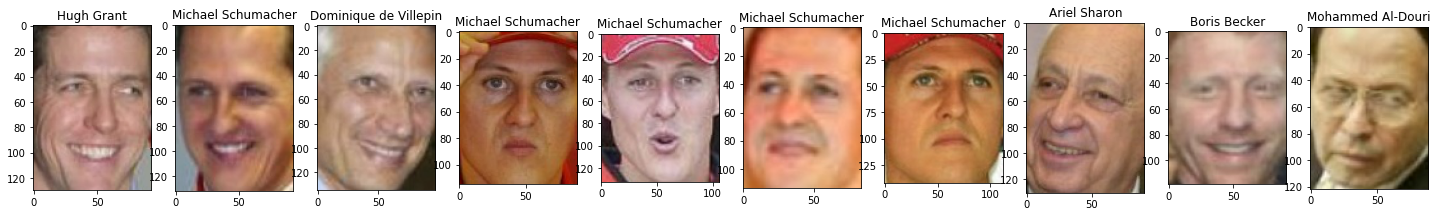

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Hugh Grant

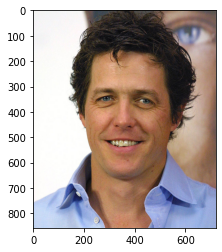

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/Hugh_Grant.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Tim Henman')

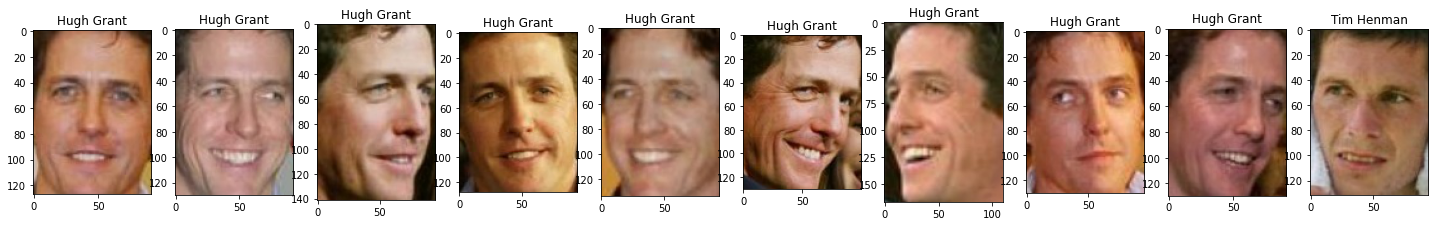

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Britney Spears

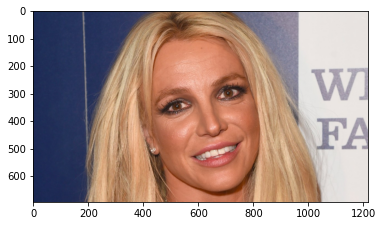

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/Britney-Spears.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Pamela Anderson')

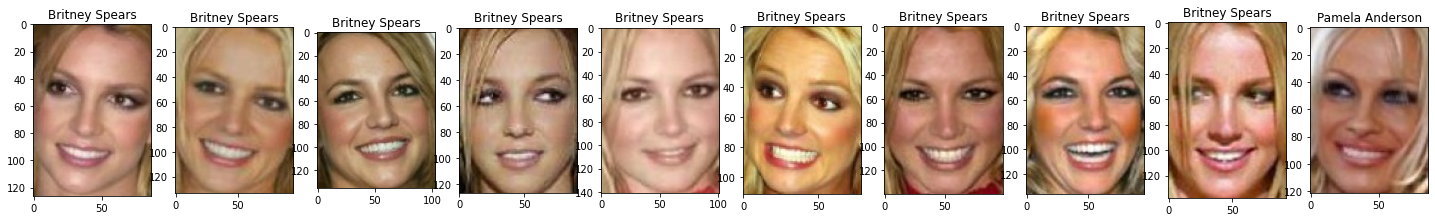

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## George W Bush

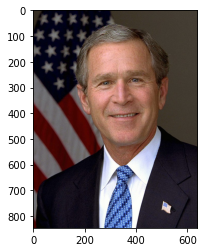

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/George-W-Bush.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'George W Bush')

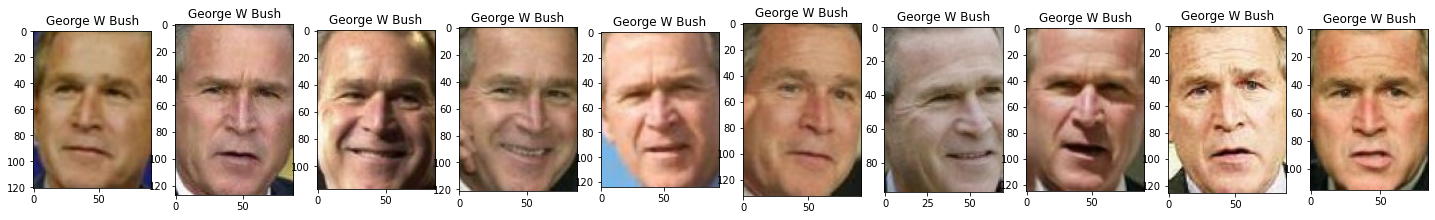

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

#10 su 10, il 7mo è etichettato sbagliato

## Serena Williams

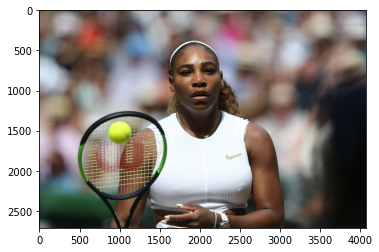

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/serena-williams.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Venus Williams')

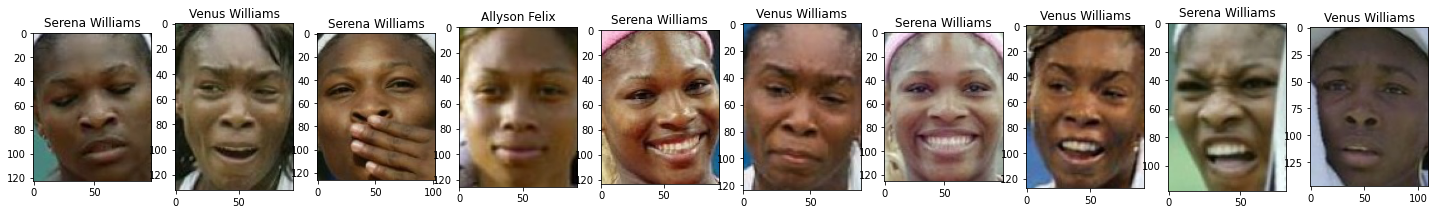

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))


## Tiger Woods

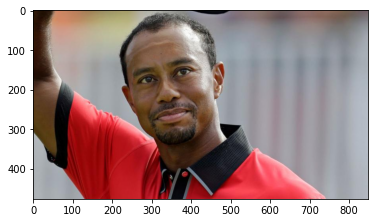

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/Tiger_Woods.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Tiger Woods')

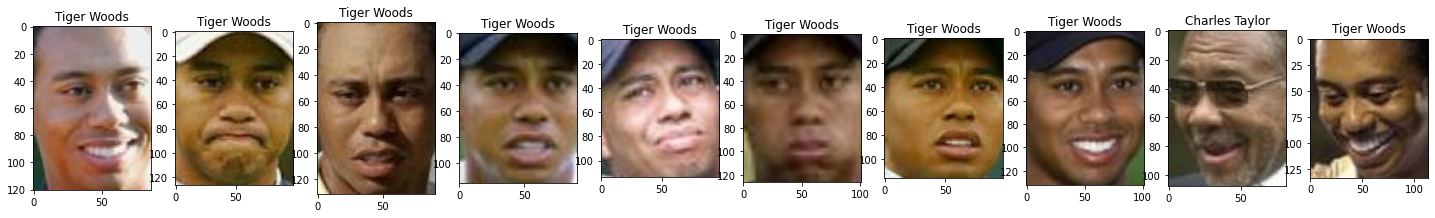

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))

## Jiang Zemin

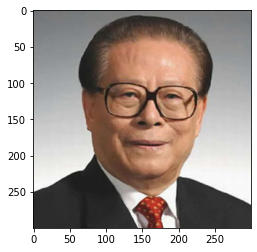

In [ ]:
img = cv.imread('/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/celebrities/jiang-zemin.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

In [ ]:
# Caricamento delle immagini per le query
face = kimage.load_img('/content/face.jpg', target_size=(224, 224)) 
# Calcolo features
face_features = VGGFace_features(face)
# Adding one dimension as required by the KDTree
face_features = np.expand_dims(face_features, axis=0)

dist, ind = kd_tree.query(face_features, k=10)

Text(0.5, 1.0, 'Jiang Zemin')

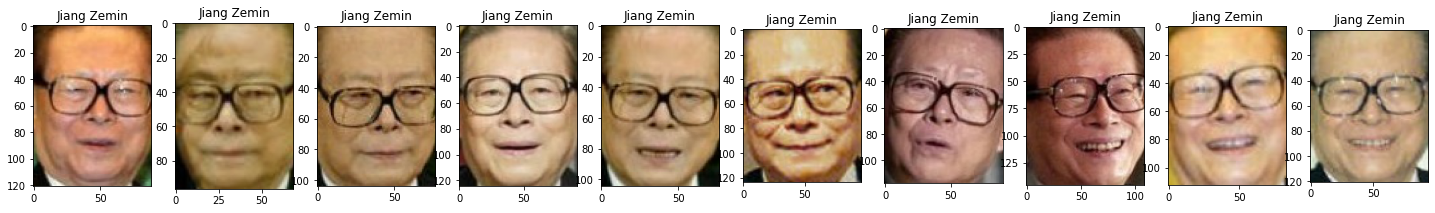

<Figure size 432x288 with 0 Axes>

In [ ]:
simili = []
labels = []
for x in range(0,10):

    img_path = "/content/drive/MyDrive/Progetto DIGITAL/03_Retrieval/vip_faces_20/" + vips_features.iloc[[ind[0][x]]].Label[ind[0][x]]
    img = kimage.load_img(img_path)
    start=re.search('^\d*_',vips_features.iloc[ind[0][x]].Label).end()
    end=re.search('_\d*\.jpg',vips_features.iloc[ind[0][x]].Label).start()
    labels.append(vips_features.iloc[ind[0][x]].Label[start:end].replace('_',' '))
    simili.append(img)

f, axes = plt.subplots(1,10, figsize = (25,20))
plt.figure()
axes[0].imshow(simili[0])
axes[0].set_title(str(labels[0]))
axes[1].imshow(simili[1])
axes[1].set_title(str(labels[1]))
axes[2].imshow(simili[2])
axes[2].set_title(str(labels[2]))
axes[3].imshow(simili[3])
axes[3].set_title(str(labels[3]))
axes[4].imshow(simili[4])
axes[4].set_title(str(labels[4]))
axes[5].imshow(simili[5])
axes[5].set_title(str(labels[5]))
axes[6].imshow(simili[6])
axes[6].set_title(str(labels[6]))
axes[7].imshow(simili[7])
axes[7].set_title(str(labels[7]))
axes[8].imshow(simili[8])
axes[8].set_title(str(labels[8]))
axes[9].imshow(simili[9])
axes[9].set_title(str(labels[9]))